In [50]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [51]:
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
           'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
               'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
        'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
        'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [52]:
X = tuple(zip(Outlook, Temperature, Humidity, Wind))
X = OneHotEncoder().fit_transform(X).toarray()
Y = LabelEncoder().fit_transform(Play)

print(X)
print(Y)

[[0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [53]:
from sklearn.model_selection import train_test_split

#split data set into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=17)

In [54]:
model = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=17, random_state=17)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=17, random_state=17)

In [55]:
from sklearn import metrics

Y_predicated = model.predict(X_test)

In [56]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics

print(f"Accuracy is :- {metrics.accuracy_score(Y_test, Y_predicated)}")

# print precision and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(Y_test, Y_predicated)
recall = recall_score(Y_test, Y_predicated)

print(f"precision :- {precision}")
print(f"recall :- {recall}")

Accuracy is :- 0.6
precision :- 0.6666666666666666
recall :- 0.6666666666666666


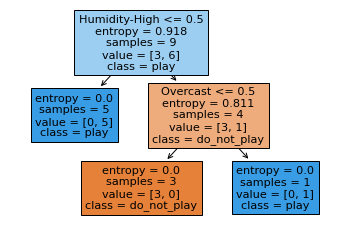

In [57]:
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(model,
               feature_names=['Overcast', 'Rainy', 'Sunny', 'Mild', 'Hot', 'Cool', 'Humidity-High', 'Humidity-Normal',
                              'Wind-False', 'Wind-True'],
               class_names=['do_not_play', 'play'],
               filled=True)
plt.show()

In [58]:
#(1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?

#(2) What will be the value of Play, if Outlook is ’Sunny’, Temprature is ’Cool’, Humidity =’High’, and Wind = ’True’?

output = model.predict([[0, 1, 0, 0, 1, 0, 0, 1, 1, 0]])
print(f"final prediction :- {output}")

output = model.predict([[0, 0, 1, 1, 0, 0, 1, 0, 0, 1]])
print(f"final prediction :- {output}")


final prediction :- [1]
final prediction :- [0]
